In [1]:
# Preamble 
try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
except:
    pass

from astropy.table import Table,join,hstack,vstack
import glob
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# First read in the unvalidated GALAH DR4 file
galah_dr4_raw1 = Table.read('../spectrum_post_processing/galah_dr4_allspec_not_validated.fits')
galah_dr4_raw1['sobject_id_left'] = galah_dr4_raw1['sobject_id']
galah_dr4_raw2 = Table.read('../spectrum_post_processing/galah_dr4_allspec_not_validated.fits')
galah_dr4_raw2['sobject_id_right'] = galah_dr4_raw1['sobject_id']

In [3]:
# Then read in GALAH DR3
wide_binaries_both = Table.read('../auxiliary_information/GALAH_DR3_ElBadry_sobject_ids.fits')
wide_binaries = Table()
wide_binaries['sobject_id_left'] = wide_binaries_both['sobject_id_1']
wide_binaries['sobject_id_right'] = wide_binaries_both['sobject_id_2']

In [4]:
# Join them with the tmass_id keyword
joined_left = join(galah_dr4_raw1, wide_binaries, keys='sobject_id_left')
joined = join(joined_left, galah_dr4_raw2, keys='sobject_id_right')

teff


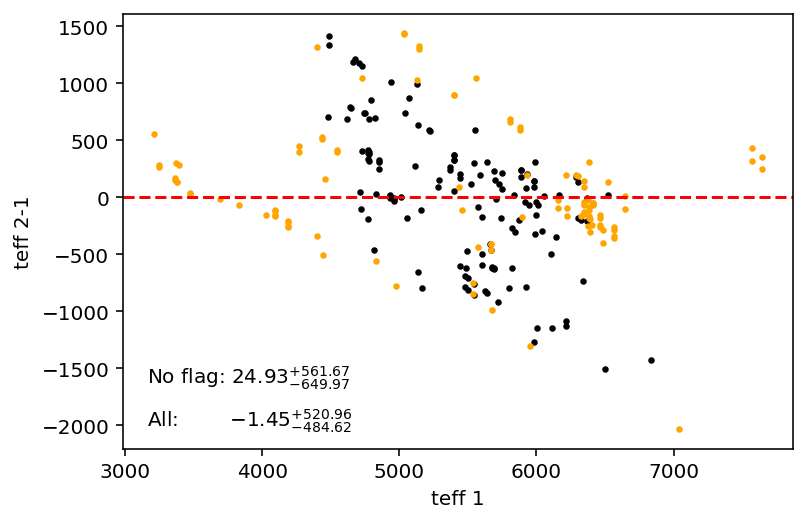

logg


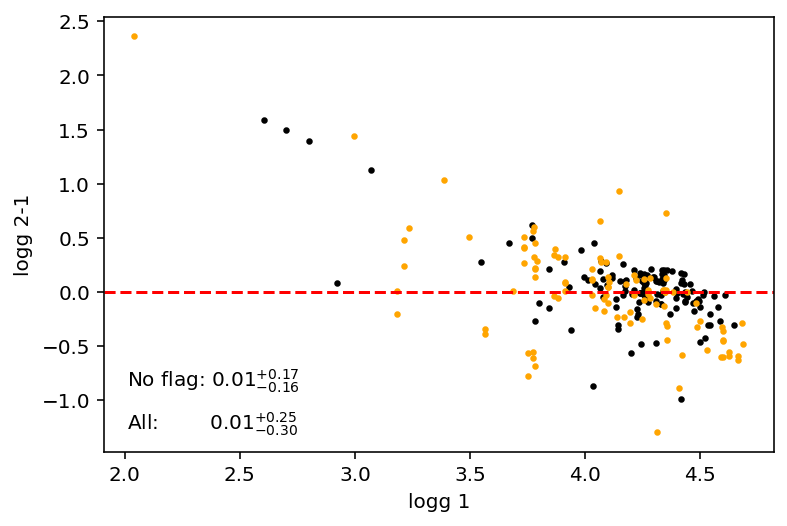

fe_h


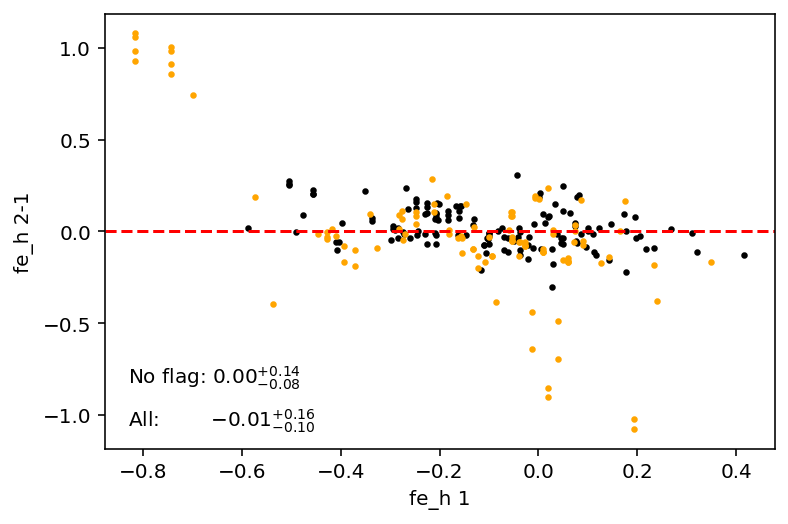

vmic


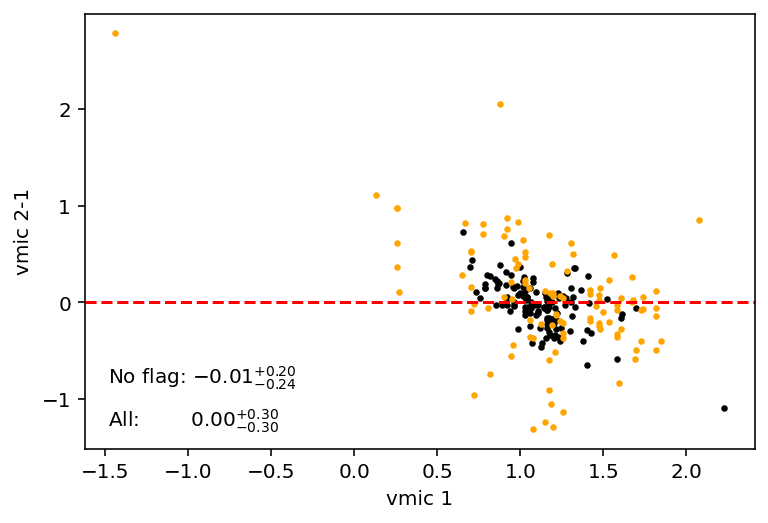

vsini


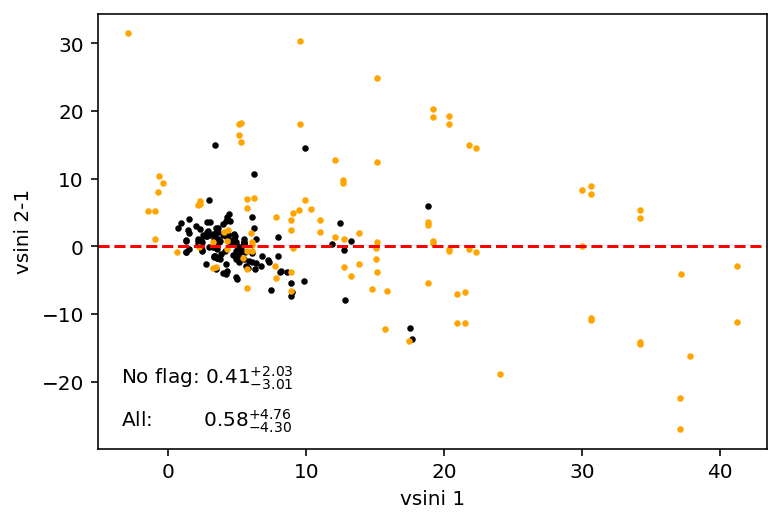

li_fe


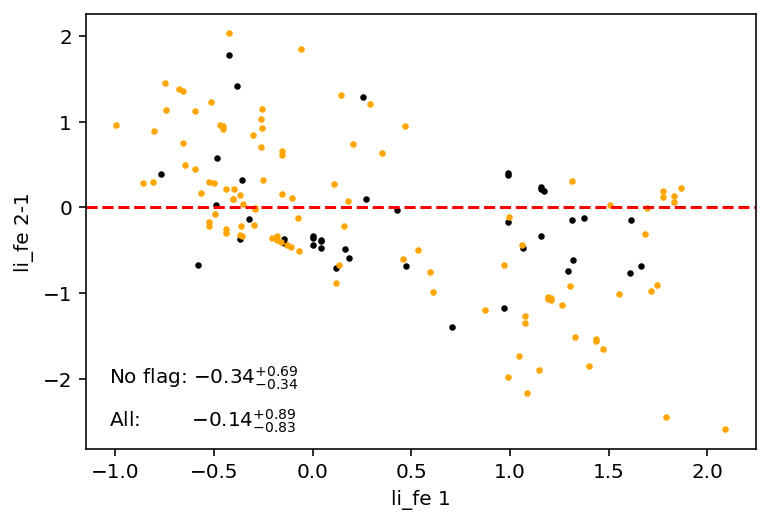

c_fe


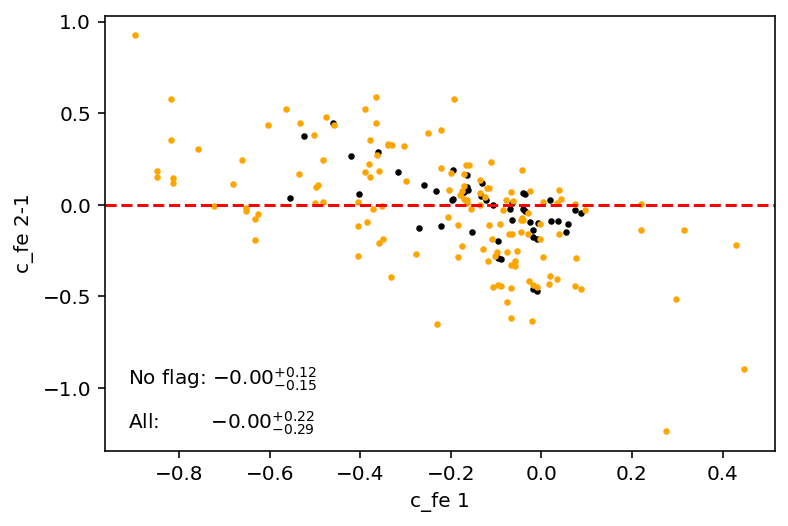

n_fe


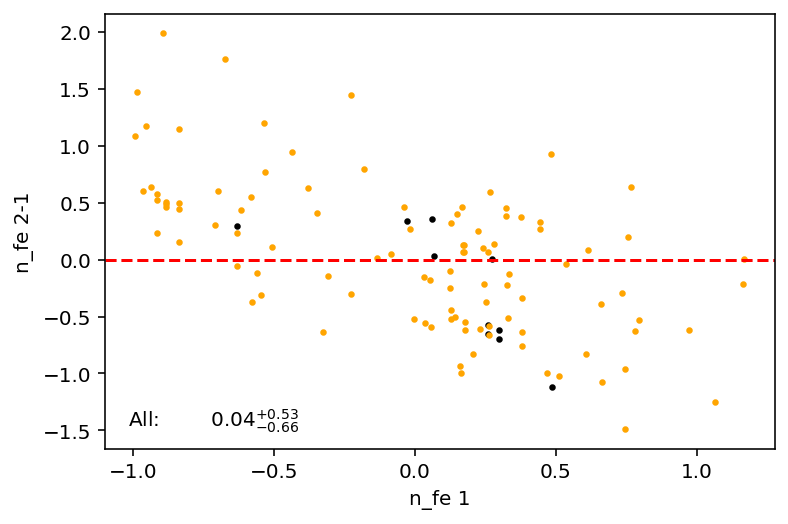

o_fe


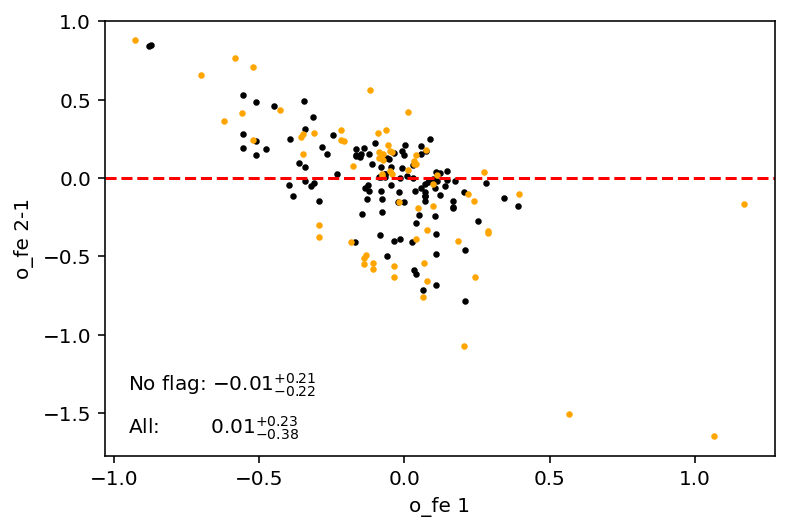

na_fe


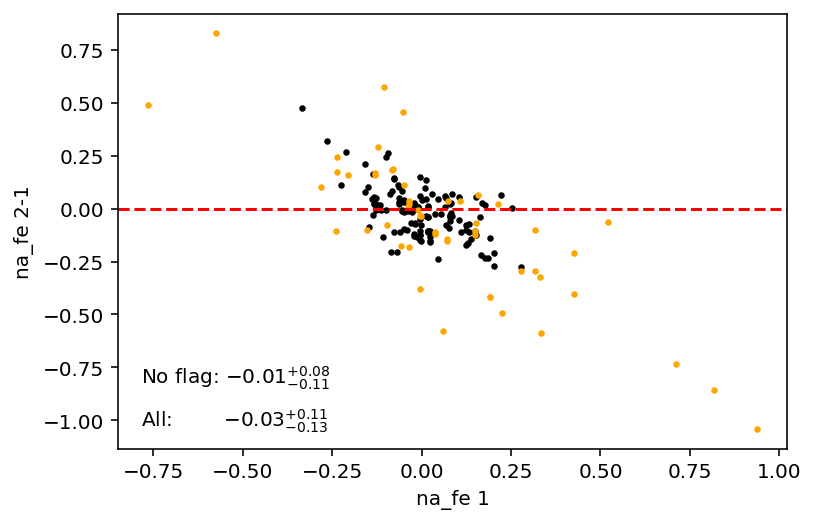

mg_fe


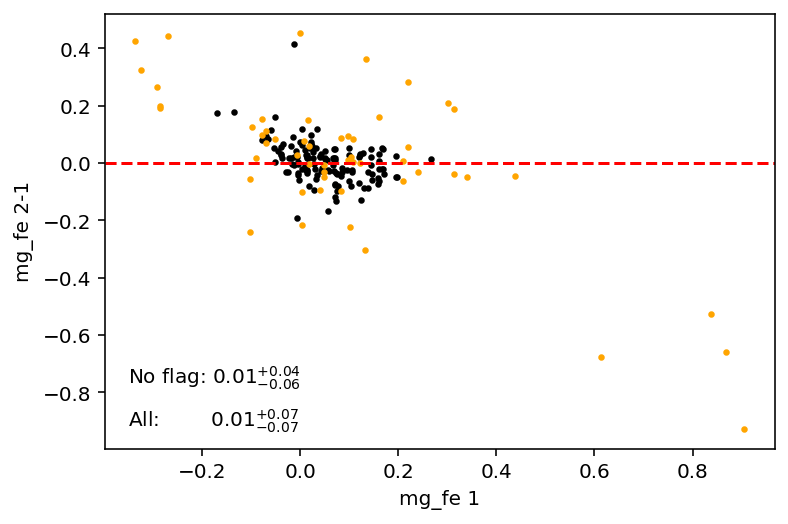

al_fe


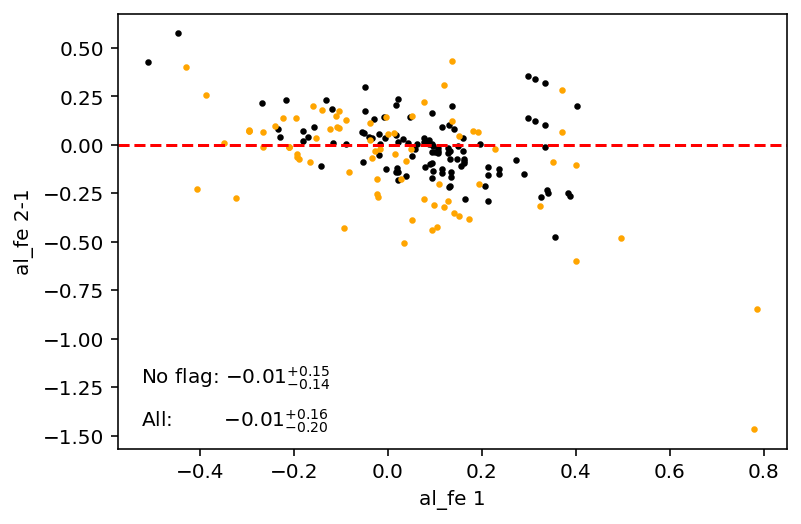

si_fe


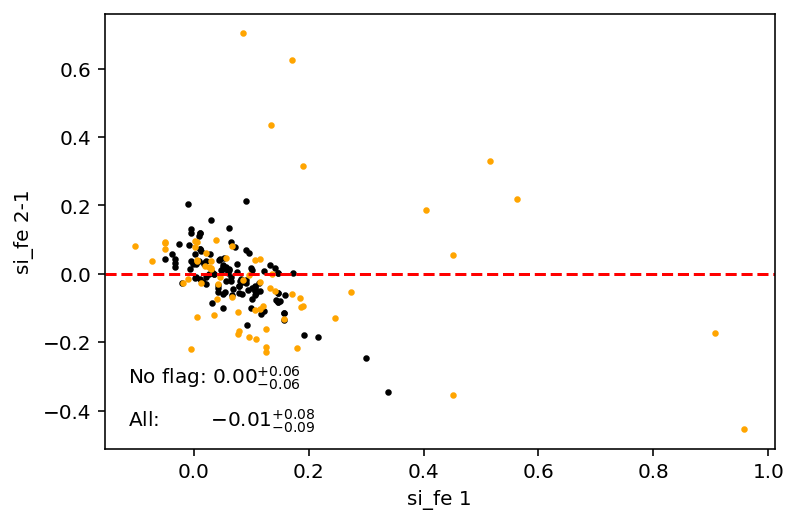

k_fe


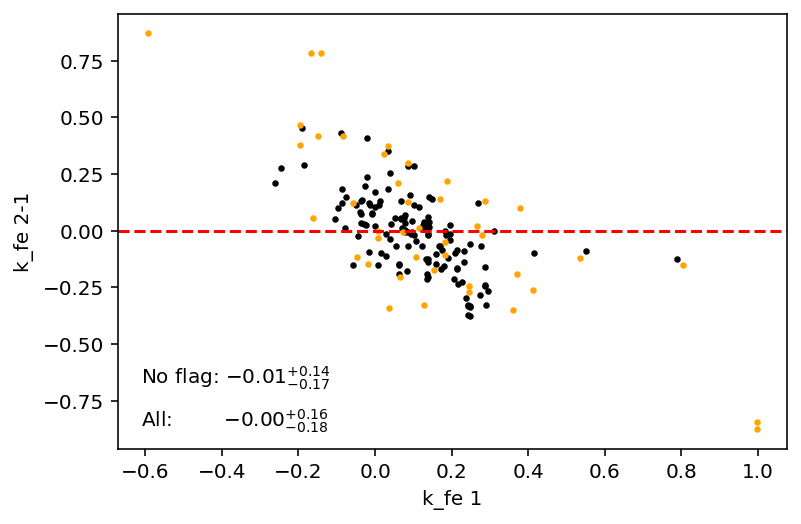

ca_fe


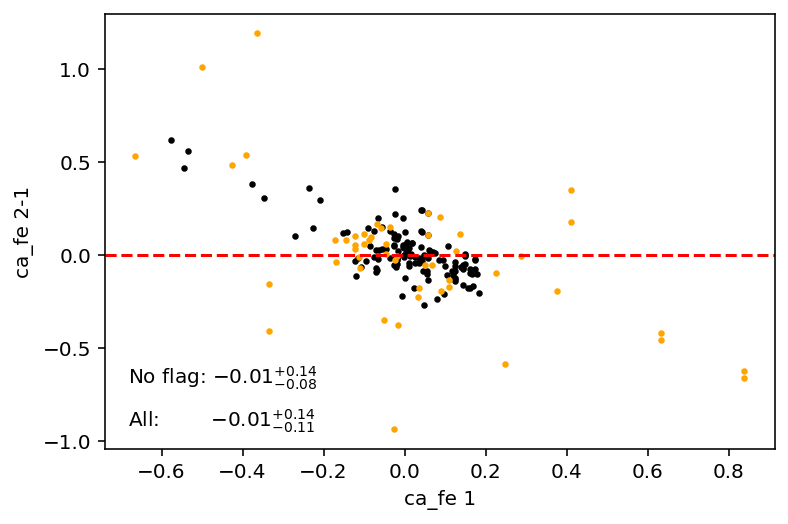

sc_fe


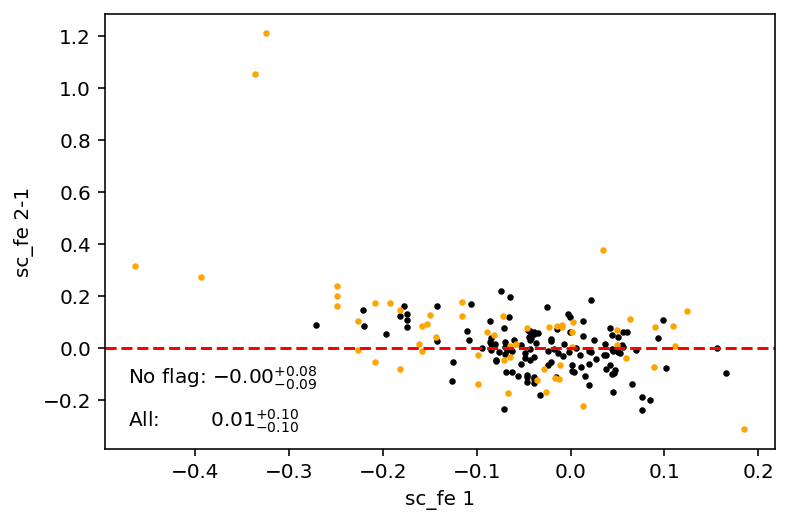

ti_fe


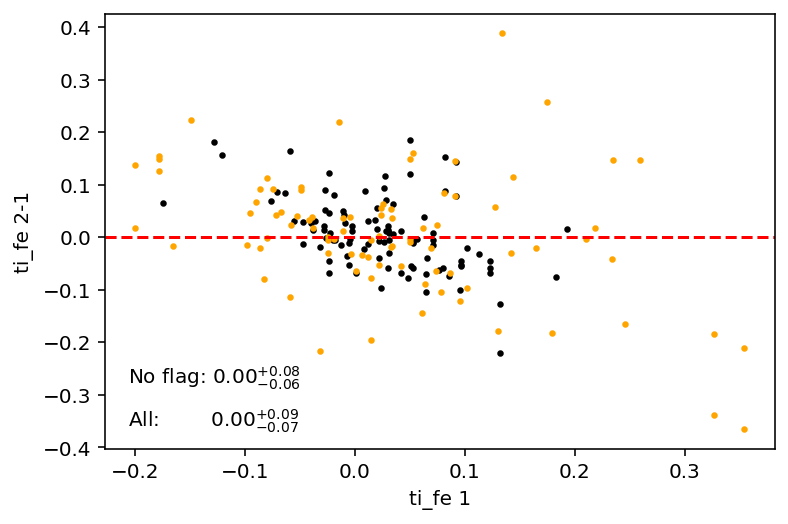

v_fe


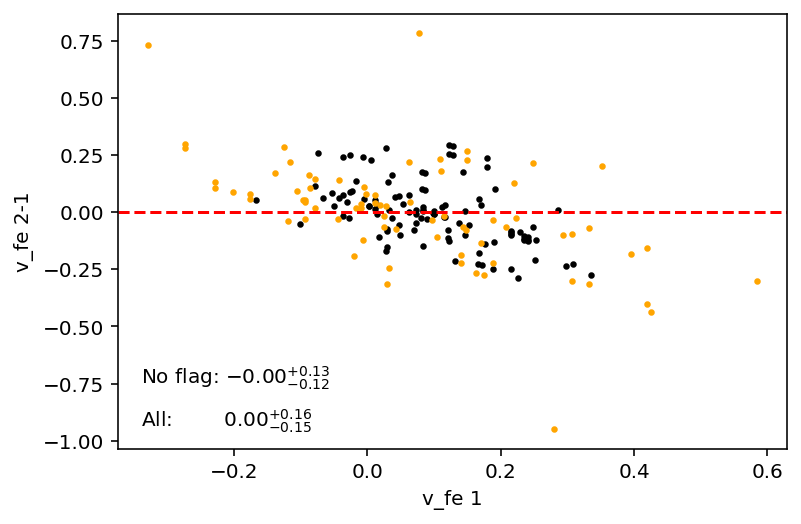

cr_fe


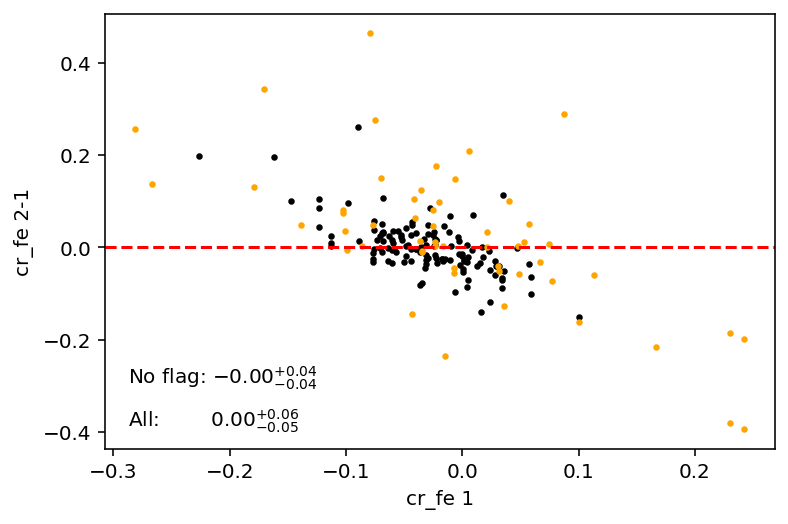

mn_fe


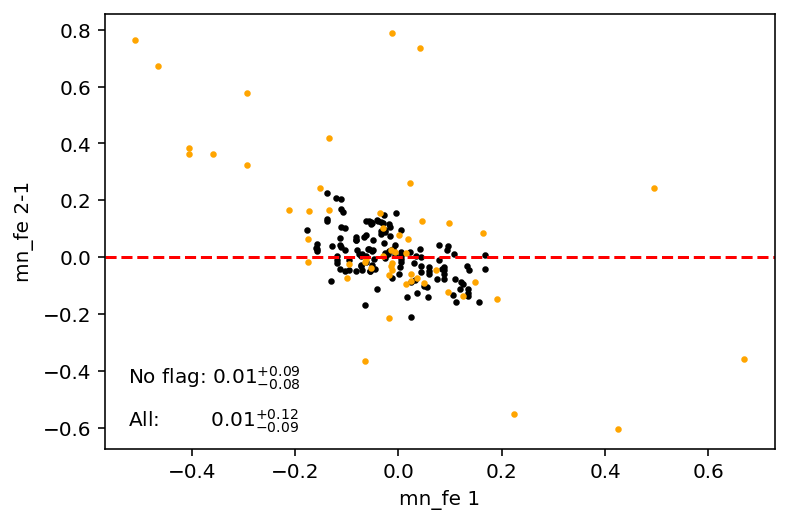

co_fe


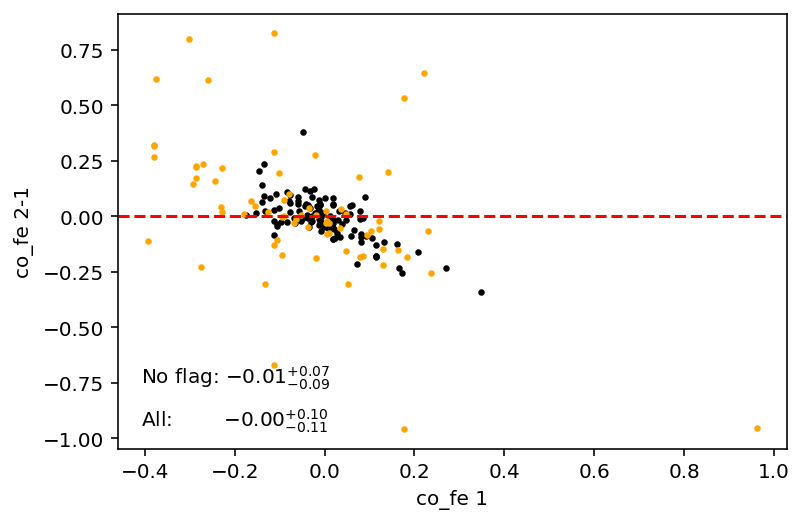

ni_fe


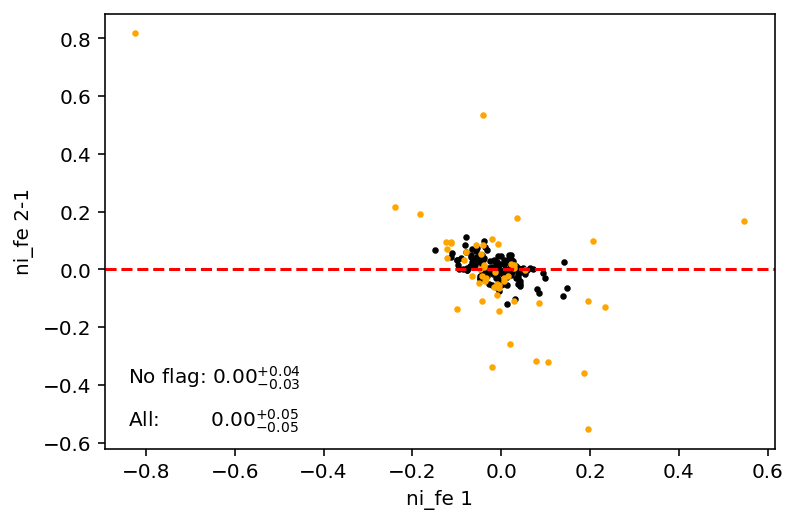

cu_fe


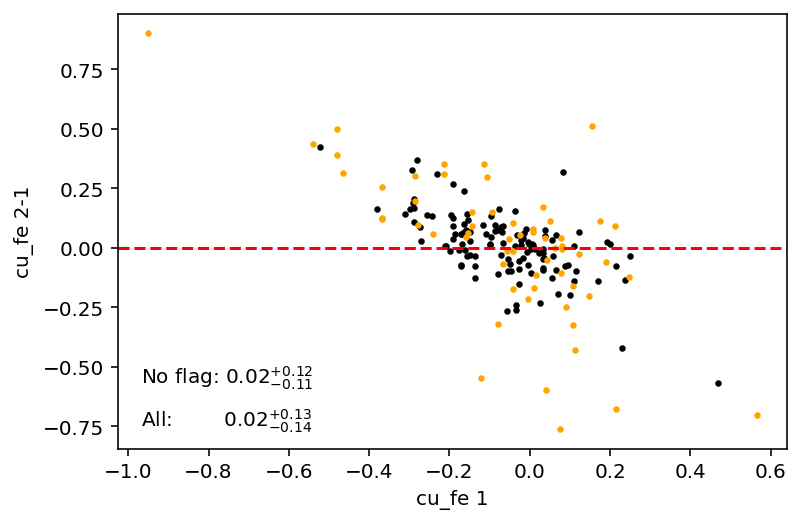

zn_fe


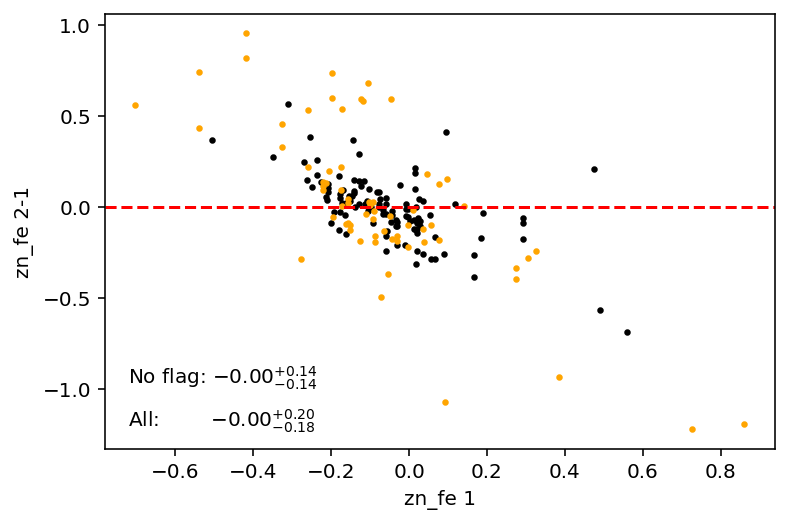

rb_fe


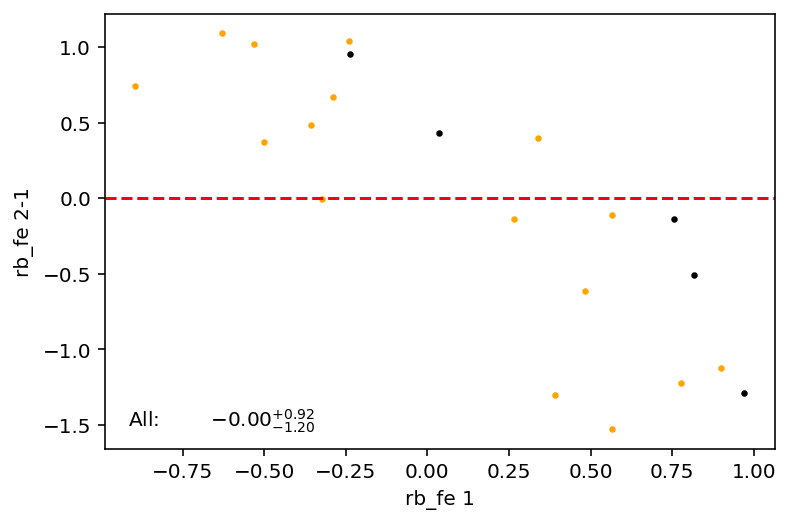

sr_fe


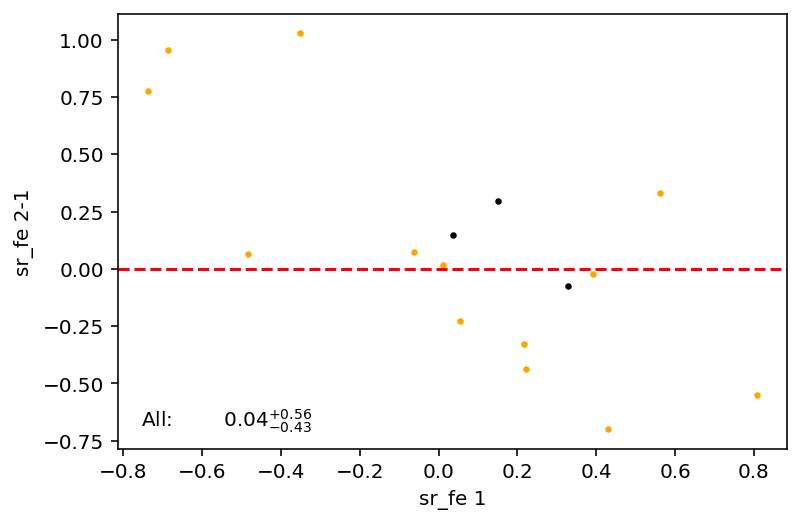

y_fe


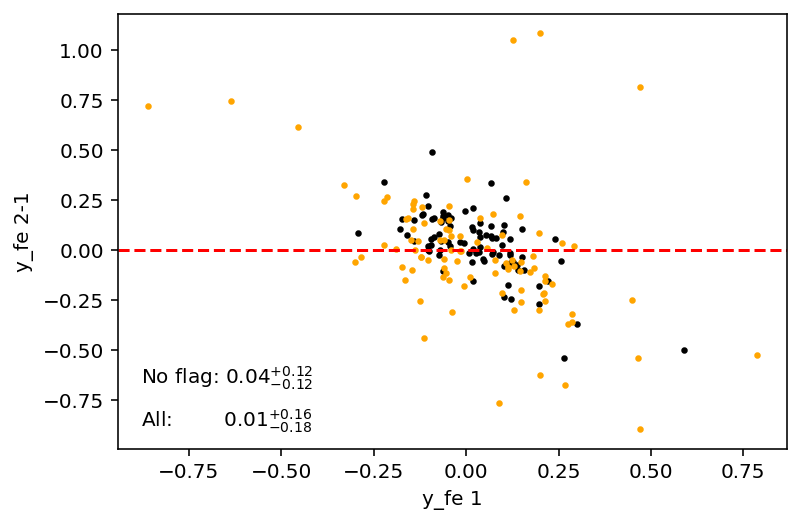

zr_fe


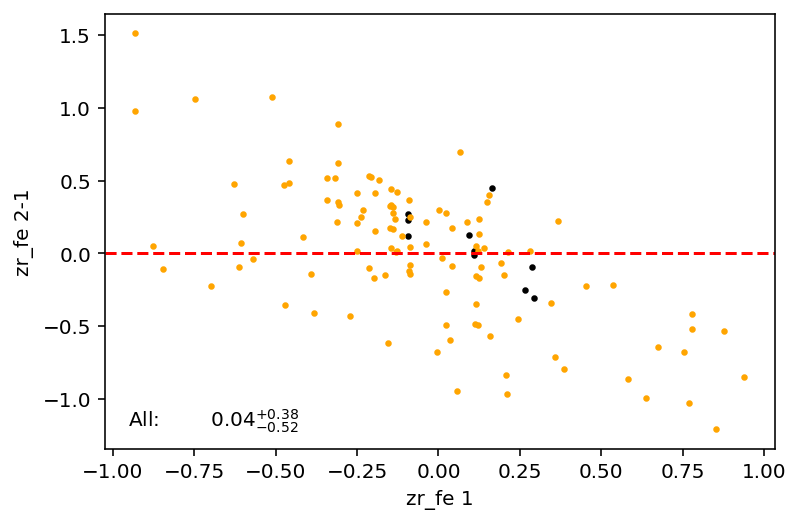

mo_fe


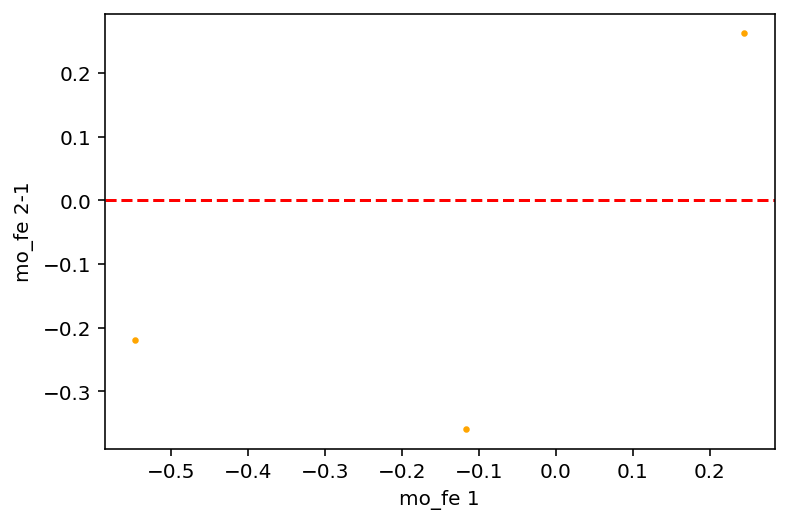

ru_fe


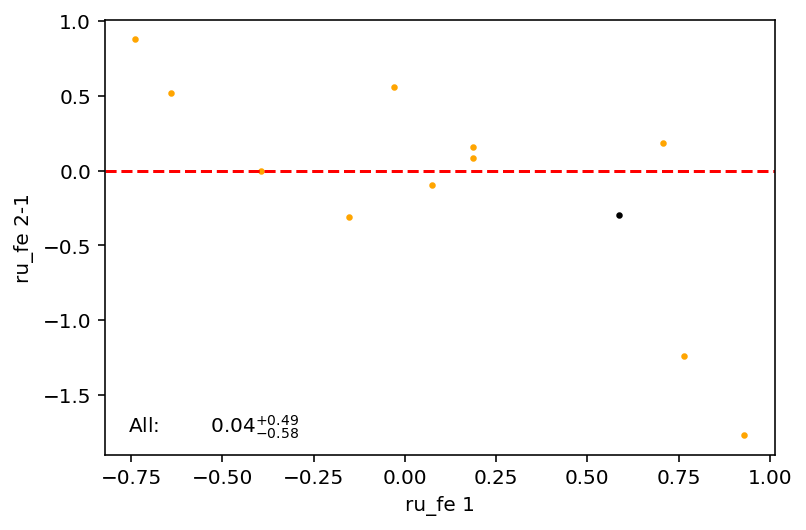

ba_fe


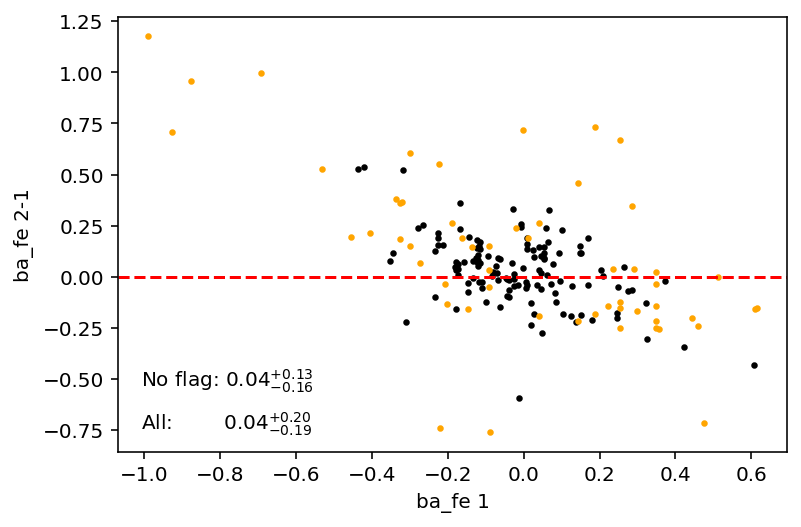

la_fe


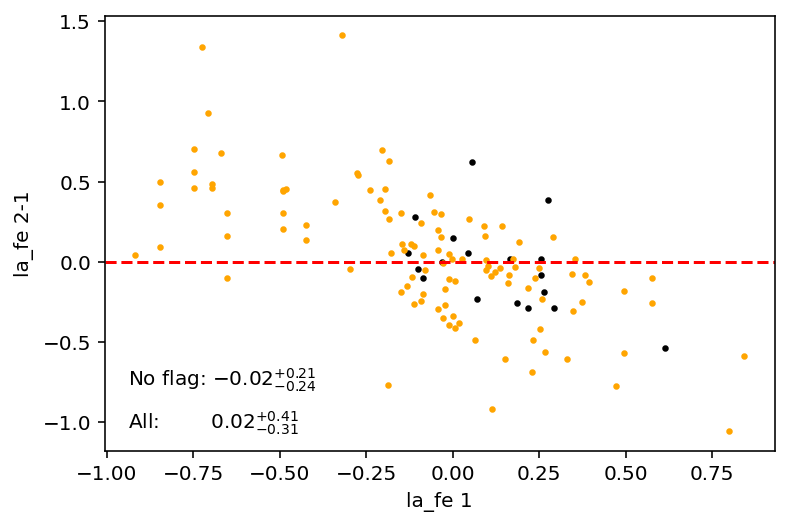

ce_fe


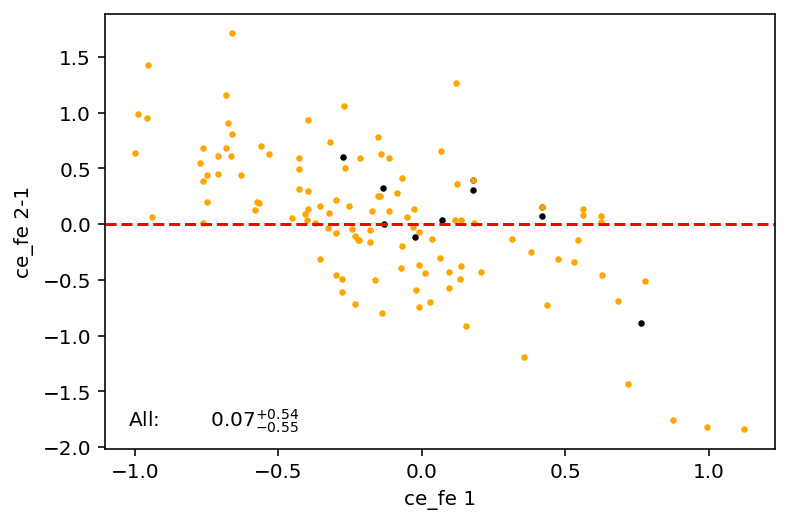

nd_fe


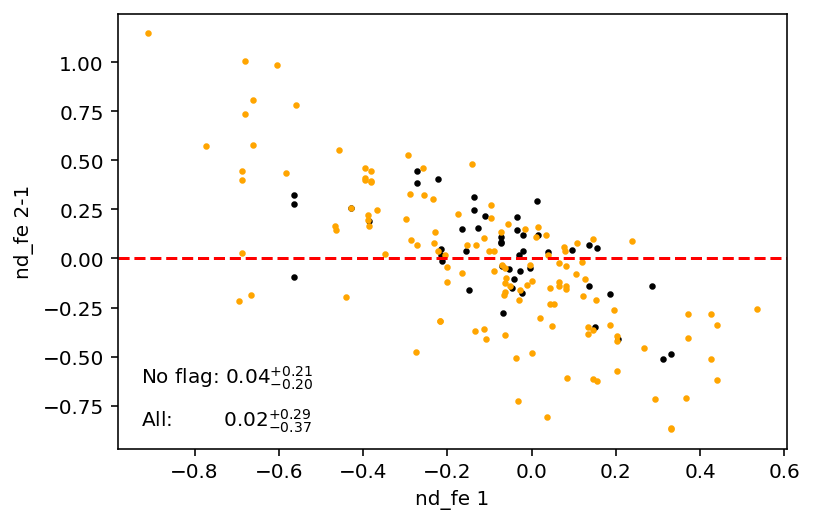

sm_fe


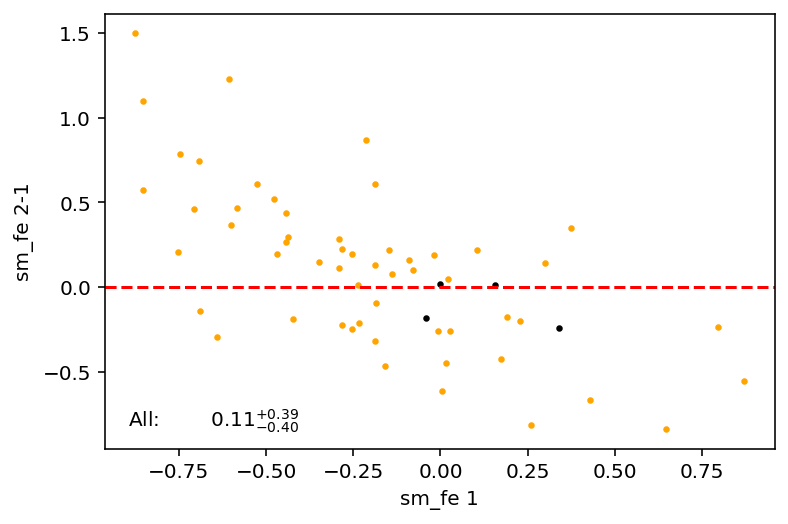

eu_fe


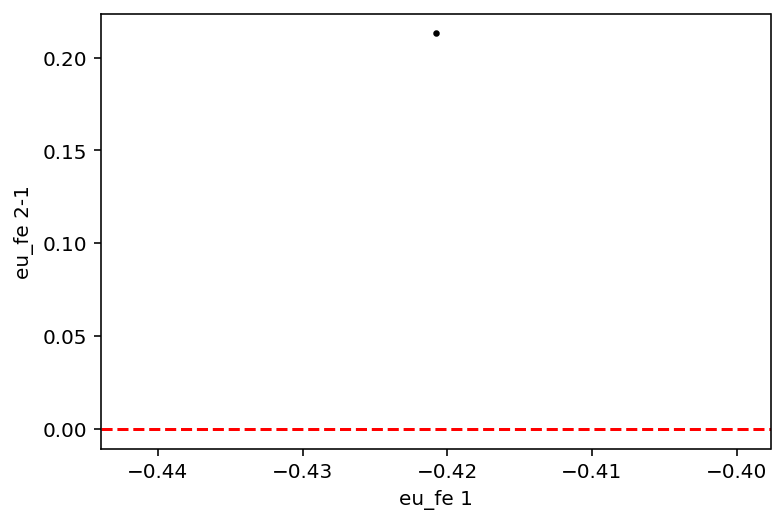

In [5]:
exclude = [
'sobject_id',
'tmass_id',
'gaiadr3_source_id',
'survey_name',
'field_id',
'setup',
'mjd',
'ra',
'dec',
'best_spec4star',
'snr_px_ccd1',
'snr_px_ccd2',
'snr_px_ccd3',
'snr_px_ccd4',
'chi2_sp',
'px_used_perc',
'model_name',
'closest_model',
'comp_time',
'flux_contr',
'e_flux_contr',
'rv_comp_nr',
'rv_comp_1',
'e_rv_comp_1',
'rv_comp_1_h',
'rv_comp_1_p',
'rv_comp_2',
'e_rv_comp_2',
'rv_comp_2_h',
'rv_comp_2_p',
'rv_gaia_dr3',
'e_rv_gaia_dr3',
'v_bary_eff',
'e_teff',
'e_logg',
'e_fe_h',
'e_vmic',
'e_vsini',
'teff_comp_2',
'e_teff_comp_2',
'logg_comp_2',
'e_logg_comp_2',
'fe_h_comp_2',
'e_fe_h_comp_2',
'vmic_comp_2',
'e_vmic_comp_2',
'vsini_comp_2',
'e_vsini_comp_2',
'sb2_rv_16',
'sb2_rv_50',
'sb2_rv_84',
'ew_h_beta',
'ew_h_alpha',
'ew_k_is',
'sigma_k_is',
'rv_k_is',
'ew_dib5780',
'sigma_dib5780',
'rv_dib5780',
'ew_dib5797',
'sigma_dib5797',
'rv_dib5797',
'ew_dib6613',
'sigma_dib6613',
'rv_dib6613',
'sobject_id_le',
'sobject_id_rig',
]

for label in joined.keys():
    if (label[:-2] not in exclude) & (label[:2] != 'e_') & (label[:4] not in ['flag','cov_']) & (label[-2:] not in ['_2']):
        label = label[:-2]
        
        unflagged = (joined['flag_sp_1'] == 0) & (joined['flag_sp_2'] == 0)
        flagged = (joined['flag_sp_1'] != 0) | (joined['flag_sp_2'] != 0)
        
        if label[-3:] in ['_fe']:
            unflagged = (joined['flag_sp_1'] == 0) & (joined['flag_sp_2'] == 0) & (joined['flag_'+label+'_1'] == 0) & (joined['flag_'+label+'_2'] == 0)
            flagged = (joined['flag_sp_1'] != 0) | (joined['flag_sp_2'] != 0) | (joined['flag_'+label+'_1'] != 0) | (joined['flag_'+label+'_2'] != 0)
        
        finite = np.isfinite(joined[label+'_1']) & np.isfinite(joined[label+'_2'])
        
        #print("'"+label+"',")
        print(label)

        f, ax = plt.subplots()
        ax.scatter(
            joined[label+'_1'][unflagged],
            joined[label+'_2'][unflagged]-joined[label+'_1'][unflagged],
            c='k',s=5
        )
        ax.scatter(
            joined[label+'_1'][flagged],
            joined[label+'_2'][flagged]-joined[label+'_1'][flagged],
            c='orange',s=5
        )
        
        if len(joined[label+'_2'][unflagged]) > 10:
            perc = np.percentile(joined[label+'_2'][unflagged]-joined[label+'_1'][unflagged],q=[16,50,84])
            ax.text(0.035,0.15,r'No flag: $'+"{:.2f}".format(perc[1])+'_{-'+"{:.2f}".format(perc[1]-perc[0])+'}^{+'+"{:.2f}".format(perc[2]-perc[1])+'}$',transform=ax.transAxes)
        if len(joined[label+'_2'][finite]) > 10:
            perc = np.percentile(joined[label+'_2'][finite]-joined[label+'_1'][finite],q=[16,50,84])
            ax.text(0.035,0.05,r'All:        $'+"{:.2f}".format(perc[1])+'_{-'+"{:.2f}".format(perc[1]-perc[0])+'}^{+'+"{:.2f}".format(perc[2]-perc[1])+'}$',transform=ax.transAxes)
        
        
        ax.axhline(0,c='r',ls='dashed')
        ax.set_xlabel(label+' 1')
        ax.set_ylabel(label+' 2-1')
        plt.show()
        plt.close()